In [1]:
import zipfile
with zipfile.ZipFile("dataset_cleaned.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset_cleaned_extracted")


In [1]:
import pandas as pd
train = pd.read_csv("dataset_cleaned_extracted/train.csv")
test = pd.read_csv("dataset_cleaned_extracted/test.csv")
valid = pd.read_csv("dataset_cleaned_extracted/valid.csv")

In [2]:
num_columns = train.select_dtypes(['float64']).columns
print(num_columns)

Index(['Male', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'HeightInMeters', 'WeightInKilograms',
       'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [3]:
len(num_columns)

36

In [4]:
x_columns = ['Male', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'HeightInMeters', 'WeightInKilograms',
       'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
print(x_columns)

['Male', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [5]:
len(x_columns)

35

In [6]:
y_column = 'HadHeartAttack'

In [7]:
train_x = train[x_columns]
train_y = train[y_column]

test_x = test[x_columns]
test_y = test[y_column]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676617 entries, 0 to 676616
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 676617 non-null  int64  
 1   State                      676617 non-null  object 
 2   Male                       676617 non-null  float64
 3   GeneralHealth              676617 non-null  float64
 4   PhysicalHealthDays         676617 non-null  float64
 5   MentalHealthDays           676617 non-null  float64
 6   LastCheckupTime            676617 non-null  object 
 7   PhysicalActivities         676617 non-null  float64
 8   SleepHours                 676617 non-null  float64
 9   RemovedTeeth               676617 non-null  float64
 10  HadHeartAttack             676617 non-null  float64
 11  HadAngina                  676617 non-null  float64
 12  HadStroke                  676617 non-null  float64
 13  HadAsthma                  67

### Definiowanie modelu

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam
def create_model():
    inputs = keras.Input(shape=(35,))
    dense1 = layers.Dense(64, activation="relu")(inputs)
    dropout1 = layers.Dropout(0.2)(dense1)
    dense2 = layers.Dense(32, activation="relu")(dropout1)
    dropout2 = layers.Dropout(0.2)(dense2)
    output = layers.Dense(1, activation="sigmoid")(dropout2)
    model = keras.Model(inputs=inputs, outputs=output)

    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

model = create_model()

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense (Dense)               (None, 64)                2304      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable par

### Trenowanie modelu

In [11]:
# Early stopping dla regularyzacji
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)

In [12]:
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=11, callbacks=[callback])

Epoch 1/11
21145/21145 [==============================] - 22s 994us/step - loss: 0.4334 - accuracy: 0.7998 - val_loss: 0.3714 - val_accuracy: 0.8448
Epoch 2/11
21145/21145 [==============================] - 21s 972us/step - loss: 0.4257 - accuracy: 0.8038 - val_loss: 0.4273 - val_accuracy: 0.8249
Epoch 3/11
21145/21145 [==============================] - 21s 992us/step - loss: 0.4224 - accuracy: 0.8056 - val_loss: 0.4245 - val_accuracy: 0.8219
Epoch 4/11
21145/21145 [==============================] - 20s 962us/step - loss: 0.4201 - accuracy: 0.8074 - val_loss: 0.4108 - val_accuracy: 0.8234


### Historia treningu

##### Loss

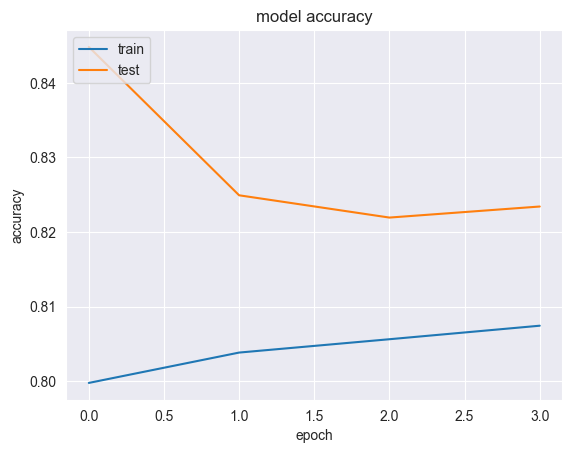

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Test loss < Train loss ze względu na warstwy dropout

##### Accuracy

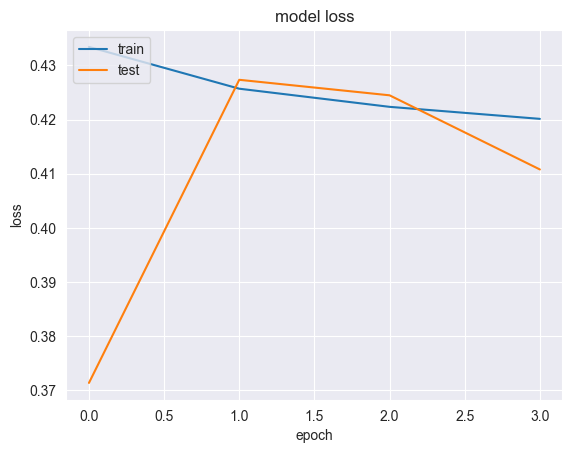

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Zapisywanie modelu

In [19]:
model.save("model_v1.keras")

### Testowanie na zbiorze walidacyjnym

In [20]:
valid_x = valid[x_columns]
valid_y = valid[y_column]

In [36]:
import numpy as np
predictions = model.predict(valid_x)[:,0]
true_answers = valid_y.to_numpy()
validation_accuracy = np.sum(np.rint(predictions) == true_answers)/len(true_answers)
print(f"Poprawność na zbiorze walidacyjnym: {validation_accuracy:.2%}")

1392/1392 [==============================] - 1s 569us/step
Poprawność na zbiorze walidacyjnym: 86.15%


In [37]:
print(predictions[:100])

[0.08692811 0.12067404 0.31880796 0.64843357 0.15188715 0.06517262
 0.03407578 0.49311596 0.00781232 0.2089161  0.46056542 0.45341685
 0.4294767  0.25619727 0.20345858 0.2302334  0.38631877 0.36519188
 0.04014764 0.23888215 0.27519897 0.08928084 0.05204074 0.42043713
 0.19055638 0.29787344 0.23068897 0.88435644 0.03139259 0.95048493
 0.2457671  0.5858893  0.02678488 0.06240147 0.52132165 0.01431455
 0.02444405 0.07804424 0.11274771 0.12714393 0.35450152 0.01294624
 0.190797   0.07512036 0.48486376 0.06140704 0.9019506  0.08810509
 0.61831665 0.15642735 0.03310075 0.04532438 0.10763614 0.4277772
 0.20325996 0.8980398  0.7491019  0.38502344 0.03970775 0.0401529
 0.03046079 0.10123587 0.04993626 0.05702    0.18049946 0.1223311
 0.731555   0.40104443 0.18443953 0.1265702  0.07467585 0.03895461
 0.35271063 0.38039213 0.4450048  0.03670818 0.05534125 0.91664517
 0.413391   0.12545326 0.11306539 0.4350903  0.48778924 0.40804324
 0.33885244 0.21948677 0.01242744 0.02531701 0.6693964  0.1539347

In [38]:
print(np.rint(predictions)[:100])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [39]:
print(true_answers[:100])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
